# Clase Tutorial 6: Ensemble Learning - Arboles de decision


In [ ]:
%load_ext autoreload
%autoreload 2

# 🌳 Introducción a los Árboles de Decisión 
Los árboles de decisión son un algoritmo de aprendizaje supervisado utilizado tanto para problemas de regresión como de clasificación.

Consiste en **dividir los datos en subconjuntos basados en los valores de las características (features)**. Esto forma una estructura de árbol 🌲, donde cada nodo representa una decisión sobre una característica específica. Así, se busca predecir un valor a partir de inferencias de los datos conocidos.

Podemos pensar en los árboles de decisión como una **aproximación por partes**. Cada rama del árbol representa una posible decisión, y cada hoja 🍃 es una predicción final.



### ⚡  Existen distintos tipos de arboles:



- Árboles de decisión simples (generalmente llamados CART - Clasification and Regression Trees):  
    - **Árboles de clasificación:** realizan predicciones sobre una variable **categórica**.
    - **Árboles de regresión:** realizan predicciones sobre una variable **contínua**.
    
    
- Árboles de decisión basados en técnicas de Ensamble:
    - **Bagging**.
    - **Random Forest**.  
    - **Boosting**.  

## Estructura General

Un árbol de decisión es una estructura similar a un diagrama de flujo, es por eso que los árboles de decisión son fáciles de entender e interpretar. Los árboles están compuestos por las siguientes partes:
- Cada **Nodo de decisión** representa una característica/atributo
- Cada **Rama** representa una regla de decisión.
- Cada **Nodo Hoja** representa el resultado.
- Al nodo superior en un árbol de decisión se lo conoce como el **nodo raíz**.
- Al nodo del cual se desprenden otros nodos se lo llama **nodo padre** y a los nodos que se desprenden del nodo padre se los llama **nodos hijo**
- Cada rama que no sea un nodo hoja se la puede considerar como un **sub-árbol**.


<img src="structure-of-a-decision-tree.png" alt="Estructura de un Árbol de Decisión" width="600"/>


Básicamente, se busca partir el dataset en subgrupos que comparten ciertas características hasta llegar a una agrupación de datos que sean similares entre sí.





## 🌟 Ventajas de los Árboles de Decisión

- **Fáciles de entender e interpretar**: Su representación gráfica permite una visualización clara.
-  **Manejo de datos numéricos o categóricos**: Flexibles para trabajar con diferentes tipos de datos.
- **Requieren poco preprocesamiento**: No es necesario normalizar los datos, lo que simplifica su uso.
- **Modelo de caja blanca**: Las decisiones y procesos son transparentes y comprensibles.


## ⚠️ Desventajas de los Árboles de Decisión

- **Tendencia al overfitting**: Pueden ajustarse demasiado a los datos de entrenamiento, lo que reduce su capacidad de generalización.
- **Sensibilidad a cambios en el dataset**: Pequeñas variaciones en los datos pueden resultar en árboles completamente distintos, lo que puede afectar su robustez.
- **No son buenos para extrapolar**: Las decisiones no son suaves ni continuas, sino que son aproximaciones constantes por partes.
- **No garantizan el óptimo global**: Pueden no encontrar la mejor solución posible debido a su enfoque local.
- **Sesgo con datasets desbalanceados**: Pueden ser muy sesgados si el conjunto de datos no está equilibrado adecuadamente.


--- 

# 🌲 Árboles de Decisión Simples


### Ejemplo: Cane Corso y Boxer 🐶

<img src="CaneCorso_Boxer.jpg" alt="Estructura de un Árbol de Decisión" width="500"/>

Como establecimos, los árboles de decisión son como un conjunto de reglas que se aplican a los datos para predecir un resultado. En este caso, queremos predecir si un perro es de raza Cane Corso o Boxer.

En este caso, trabajamos con dos caracteristicas sencillas:
- **Tamaño**
- **Peso**

Proponemos entonces que
- <span style="background-color: pink; color: black;" >  if **Tamaño** > 63cm , then **Cane Corso**</span>
- <span style="background-color: pink; color: black;" >  if **Tamaño** <= 63cm  AND **Peso**> 40kg, then **Cane Corso**</span>
- <span style="background-color: pink; color: black;" >  if **Tamaño** <= 63cm  AND **Peso**<= 40kg, then **Boxer**</span>

De esta forma, podemos predecir la raza de un perro a partir de estas reglas. Si bien es posible que haya perros que no cumplan con estas reglas, el modelo no busca ser perfecto, sino predecir en base a las reglas establecidas y tener un grado de precisión aceptable. 

La tarea de un árbol de decisión es encontrar las reglas que mejor se ajusten a los datos, y que permitan predecir con la mayor precisión posible. 






## 🛠️ Algoritmo 

Los pasos que sigue el algoritmo de los árboles de decisión son:

1. **Selección de característica**: Se busca elegir el *feature* que mejor divide los datos en subconjuntos homogéneos y más pequeños, que sea mejor que el actual.
2. **Realizar la partición**: Se genera un nodo de decisión que crea dos nuevos subconjuntos de datos.
3. **Repetir**: De forma recursiva, se continúa generando subconjuntos hasta llegar a los nodos hoja.

#####  🚩 ATENCIÓN!
Existen distintos criterios de parada que pueden limitar el árbol:
- Se alcanza la **profundidad máxima** del árbol.
- El **número mínimo de muestras** en un nodo no permite una nueva división.



### <span style="background-color: pink; color: black;" >  Seguimos con el ejemplo...

Veamos entonces cómo realizar esta seleccion de caracteristicas. Para ello, analizamos el dataset de perros y sus características. En esta instancia incoporamos una nueva característica: **Orejas Recortadas**.

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from IPython.display import Image

In [3]:
df=pd.read_csv("dogs_dataset.csv")
display(df.head())
print()
pd.DataFrame(df.dtypes,columns=['dtypes'])

,Raza,Tamaño,Peso,OrejasRecortadas
0,Cane Corso,66.496714,46.920728,True
1,Cane Corso,62.861736,46.917838,False
2,Cane Corso,66.647689,47.802453,True
3,Cane Corso,67.523030,45.108400,False
4,Cane Corso,65.765847,45.343853,True


,dtypes
Raza,object
Tamaño,float64
Peso,float64
OrejasRecortadas,object


In [4]:
df.groupby(['Raza']).count()


,Tamaño,Peso,OrejasRecortadas
Raza,,,
Boxer,10,10,10
Cane Corso,10,10,10


Observamos que el dataset esta equilibrado, es decir, tenemos la misma cantidad de Cane Corso que de Boxer.

Ahora, buscamos analizar el dataset y ver como se distribuyen los datos en base a las caracteristicas propuestas.

In [5]:
#cuento cuantos Cane Corso de tamano >63 hay
df[(df['Raza']=='Cane Corso') & (df['Tamaño']>63)].count()

#Cuento cuantos perros de tamano >63 hay
df[(df['Tamaño']>63)].count()

#pongo porcentajes de tamano>63 por cada raza
df.groupby(['Raza'])['Tamaño'].apply(lambda x: (x>63).mean()*100)

Raza
Boxer         20.0
Cane Corso    80.0
Name: Tamaño, dtype: float64

In [6]:
#cuento cuantos Boxer de peso < 40 hay
df[(df['Raza']=='Boxer') & (df['Peso']<40)].count()

#Cuento cuantos perros de peso <40 hay
df[(df['Peso']<40)].count()

#pongo porcentajes de peso<40 por cada raza
df.groupby(['Raza'])['Peso'].apply(lambda x: (x<40).mean()*100)


Raza
Boxer         90.0
Cane Corso    10.0
Name: Peso, dtype: float64

In [7]:
#cuento cuantos Boxer con oreja cortada hay

df[(df['Raza']=='Boxer') & (df['OrejasRecortadas']==' True')].count()

#Cuento cuantos perros con oreja cortada hay
df[(df['OrejasRecortadas']==' True')].count()

#pongo porcentajes de orejas cortadas por cada raza
df.groupby(['Raza'])['OrejasRecortadas'].apply(lambda x: (x==' True').mean()*100)



Raza
Boxer         40.0
Cane Corso    60.0
Name: OrejasRecortadas, dtype: float64

Observando estos porcentajes, podemos ver que:

- Dividir por tamaño es una buena idea, ya que logra separar los datos en dos grupos bien diferenciados. Notamos esto por la diferencia en los porcentajes de Cane Corso y Boxer en cada grupo.
- Dividir por peso también es una buena idea; esta división también muestra una homogeneidad altamente definida.
- Dividir por orejas cortadas no aporta tanta información, ya que es una categoría donde se presenta mucha heterogeneidad en los datos.

Observamos entonces que particionando a la población según los distintos atributos, puede aumentar la precisión en la clasificación. Vemos también que dicha precisión va a depender del atributo que selecionemos para realizar la partición, siendo el mejor atributo para particionar aquel que logra que los nodos hijos sean lo más homogéneos (puros) posibles. 

## 📊 Mejor Partición

Cada vez que realizamos una partición, estamos tratando de generar un subconjunto que sea lo más puro posible. Es decir, la división debe separar los datos de manera que mantenga juntos los datos similares.
Pero... ¿Cómo se determina cuál es la mejor partición?

Existen distintas métricas para evaluar la calidad de la partición, y estas dependen de si el problema es de **clasificación** o de **regresión**:

 🔍 **Regresión** (problemas con variables continuas)

1. **Reducción de Varianza** 



 🔍 **Clasificación** (problemas con variables categóricas)

2. **Impureza de Gini**

3. **Chi Cuadrado**

4. **Entropía**










### 1. `Reducción de Varianza`
- Utiliza la varianza como medida para decidir la característica en la que un nodo se divide en nodos secundarios.
- La varianza indica cuánto difieren los elementos del conjunto; cuanto más cercana a cero es la varianza, más homogéneo es el conjunto.


$$ C(D) = \frac{1}{|D|} \sum_{i \in D} (y_i - \overline{y_D})^2$$
Donde: $$ \overline{y_D} = \frac{1}{|D|} \sum_{i \in D} y_i$$


### `2. Impureza de Gini (o Índice de Gini)`
- El índice de Gini se mide para cada nodo de decisión como la probabilidad $( P(j|t) )$, que es la probabilidad de pertenecer a la clase \( j \) estando en el nodo \( t \). En otras palabras, **mide la pureza del nodo**.

$$
\begin{aligned}
Gini(t) = \sum_{j=1}^{n} [p(j|t)]^{2} = p_{1}^{2} + p_{2}^{2} + \ldots + p_{n}^{2}
\end{aligned}
$$

- Por otro lado, la impureza de Gini se mide de la siguiente manera:

$$
\begin{aligned}
Impureza\,de\,Gini(t) = 1 - Gini(t)
\end{aligned}
$$

- Habiendo calculado la impureza de Gini para cada nodo hijo, podemos calcular el valor total de la **impureza de Gini del nodo padre como el promedio ponderado de las impurezas de Gini para cada nodo hijo**:

$$
\begin{aligned}
Impureza\,de\,Gini_{split} = \frac{1}{n}\sum_{i=1}^{k}n_{i} \cdot Impureza\,de\,Gini(i)
\end{aligned}
$$

Siendo $( n_{i} )$ la población de cada nodo hijo, y $( n )$ la población total de los nodos hijos.

- Después de calcular el valor total de la impureza de Gini para el nodo padre para cada uno de los atributos, elegimos aquel atributo que tenga el valor de impureza de Gini más bajo (es decir, el que consigue que los nodos hijos sean lo más puros posibles). Esto se repite recursivamente para cada nodo hijo.


### `3. Chi Cuadrado`
- Se utiliza para realizar dos o más divisiones en un nodo. Trabaja en la significación estadística de las diferencias entre el nodo padre y los nodos hijos.
- Buscamos seleccionar la partición que maximice el valor de $( \chi^2 )$.

$$
\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

donde:

- \( r \) es el número de categorías (o clases) de la variable dependiente.
- \( c \) es el número de categorías de la característica en cuestión.
- $( O_{ij} )$ es el valor observado en la categoría \( i \) de la variable dependiente para la categoría \( j \) de la característica.
- $( E_{ij} )$ es el valor esperado, que se calcula como:

$$
E_{ij} = \frac{(\text{Total de la fila } i) \times (\text{Total de la columna } j)}{\text{Total general}}
$$





### `4. Entropía`
- En teoría de la información, la entropía se define como una forma de medir el grado de desorganización en un sistema. Es decir, busca medir qué tan similares o qué tan diferentes son los elementos de un sistema.

- Matemáticamente, esto se representa con la siguiente fórmula:

$$
\begin{aligned}
Entropía = -p_{1} \log_{2}(p_{1}) - p_{2} \log_{2}(p_{2}) - \ldots - p_{n} \log_{2}(p_{n}) = -\sum_{i=1}^{n} p_{i} \log_{2}(p_{i})
\end{aligned}
$$

donde $( p_{i} )$ es la proporción de elementos de la clase \( i \) en el nodo.

- Por otro lado, definimos la **Ganancia de Información** como:

$$
\begin{aligned}
Ganancia\ de\ Información = Entropía_{nodo\ padre} - \text{Suma ponderada de Entropía}_{nodos\ hijos}
\end{aligned}
$$


## 🔧 **Optimizaciones Posibles**

Recordemos que los árboles de decisión suelen tender a hacer sobreajuste. Por lo tanto, es necesario implementar alguna optimización que nos ayude con este problema.

Generalmente se busca realizar una 'poda' del árbol, es decir, limitar la profundidad en base a ciertos criterios. Algunos criterios de corte son:
- Limitar la profundidad máxima del árbol.
- Limitar el número mínimo de muestras requeridas en cada hoja.
- Limitar el número mínimo de muestras necesarias para particionar.




---

# 🖥️ **Pasando a Código**

Probamos el funcionamiento de un árbol de decisión sobre el conjunto de datos **"Iris"**:

- El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor).
- Se midieron cuatro características de cada muestra: el largo y ancho del sépalo y del pétalo, en centímetros.


In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = np.array(iris.data)
Y = np.array(iris.target)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (112, 4)
Test Shape: (38, 4)


In [3]:
from decision_tree_algorithm import DecisionTree

dt = DecisionTree(max_depth=3, min_samples_leaf= 1, min_information_gain=0.4)
dt.train(X_train, Y_train)

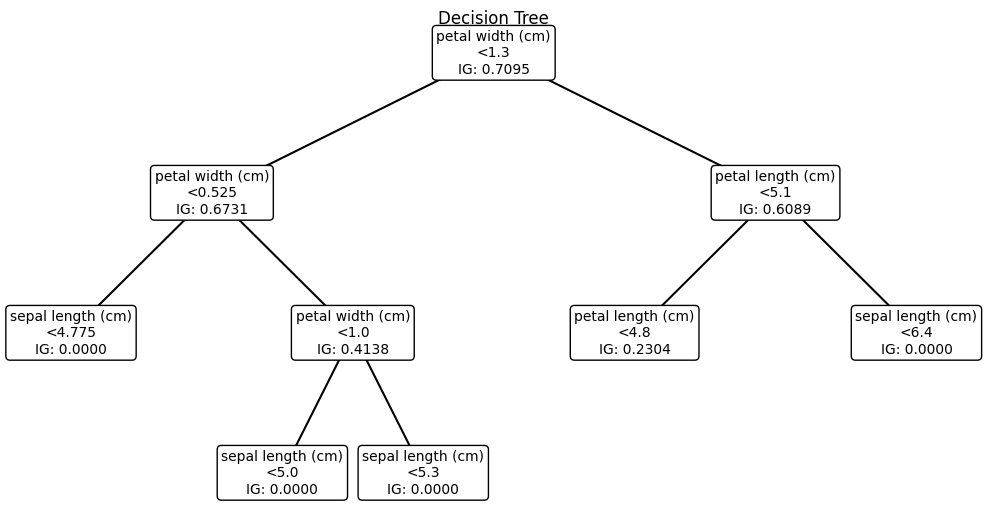

In [4]:
dt.plot_decision_tree(iris.feature_names, fig_size=(12,6))

In [5]:
dt.print_tree()

Node: 0, Feature: 3, Threshold: 1.3000, Information Gain: 0.7095
|   Node: 1, Feature: 3, Threshold: 0.5250, Information Gain: 0.6731
|   |   Node: 2, Feature: 0, Threshold: 4.7750, Information Gain: 0.0000
|   |   Node: 2, Feature: 3, Threshold: 1.0000, Information Gain: 0.4138
|   |   |   Node: 3, Feature: 0, Threshold: 5.0000, Information Gain: 0.0000
|   |   |   Node: 3, Feature: 0, Threshold: 5.3000, Information Gain: 0.0000
|   Node: 1, Feature: 2, Threshold: 5.1000, Information Gain: 0.6089
|   |   Node: 2, Feature: 2, Threshold: 4.8000, Information Gain: 0.2304
|   |   Node: 2, Feature: 0, Threshold: 6.4000, Information Gain: 0.0000


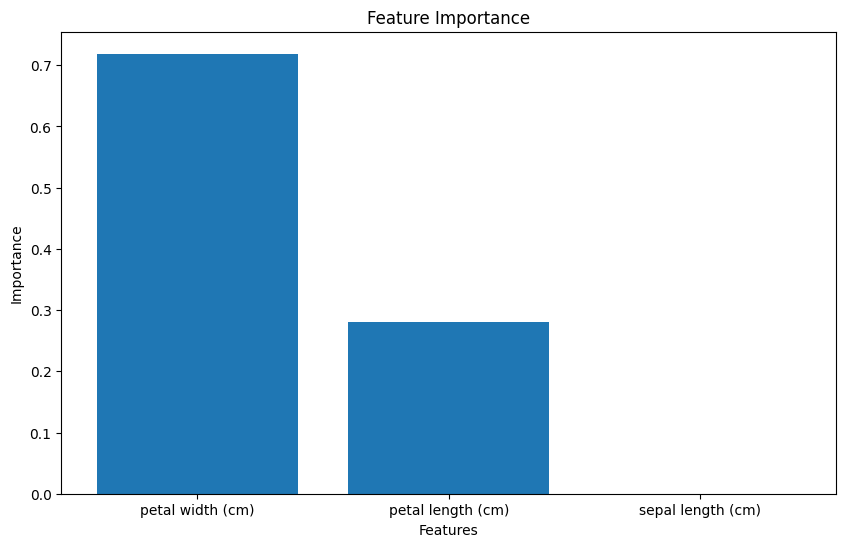

In [6]:
dt.plot_feature_importance(iris.feature_names)

In [7]:
train_preds = dt.predict(X_set=X_train)
print('""""""""""""""""""\nTrain Performance\n""""""""""""""""""')
print("Train Size:", len(Y_train))
print("True Predictions:", sum(train_preds == Y_train))
print("Train Accuracy:", sum(train_preds == Y_train)/len(Y_train) )

""""""""""""""""""
Train Performance
""""""""""""""""""
Train Size: 112
True Predictions: 106
Train Accuracy: 0.9464285714285714


In [8]:
test_preds = dt.predict(X_set=X_test)
print('""""""""""""""""""\nTest Performance\n""""""""""""""""""')
print("Test Size:", len(Y_test))
print("True Predictions:", sum(test_preds == Y_test))
print("Test Accuracy:", sum(test_preds == Y_test)/len(Y_test) )

""""""""""""""""""
Test Performance
""""""""""""""""""
Test Size: 38
True Predictions: 34
Test Accuracy: 0.8947368421052632


Funciones a implementar:
- `train_test_split`: dividir el dataset en entrenamiento y test.
- `DecisionTree`: implementar el árbol de decisión. (Recomendamos crearlo como Clase).
- Función de corte: `Variance`, `entropy`, `chi2` o `gini`.
- `fit`: entrenar el modelo.
- `predict`: predecir los valores.


---


# 🧩Árboles de Decisión con Ensamble 






## 🤔 ¿En Qué Consiste?

Los modelos de ensamble buscan aumentar la precisión de los árboles de decisión, ya que el uso de un solo árbol no suele alcanzar resultados realmente efectivos. Al usar más de un árbol, se reduce la varianza, pero se pierde la facilidad de interpretación que poseían los árboles de decisión simples.

Esta técnica se basa en los siguientes principios:
- Entrenar diferentes modelos sobre el mismo conjunto de datos.
- Permitir que cada modelo haga sus propias predicciones.
- Generar un meta-modelo que realice una agregación de las predicciones individuales de los distintos modelos.
- Generar una predicción final usando el meta-modelo que sea más robusta que las predicciones de los modelos individualmente.

<img src="ensamble.png" alt="Estructura de un Árbol de Decisión" width="600"/>

Si uno de los modelos individuales hace predicciones muy desacertadas en un determinado escenario, el resto de los modelos individuales estaría en condiciones de compensarlo. Es por esto que las predicciones del meta-modelo se vuelven más robustas.




## 🚀 Meta-modelos Conocidos

El concepto de ensamble se puede usar para muchos modelos distintos.

Algunos modelos conocidos son:
- **Bagging**
- **Random Forest**  
- **Boosting**


### 🎒 Bagging

Bagging viene de **Bootstrap Aggregation**. El método Bootstrap consiste en tomar múltiples muestras aleatorias con reemplazo del conjunto de datos original. Cada muestra es del mismo tamaño que el conjunto de datos original, pero debido al reemplazo, algunas observaciones pueden repetirse, mientras que otras pueden no aparecer.

Así se generan varios subconjuntos, donde cada uno es utilizado para entrenar un modelo independiente. Como cada modelo se entrenó con un conjunto de datos diferente, se espera que cada modelo detecte algo distinto del resto.

Para determinar la predicción final, se debe tener en cuenta el tipo de problema:
- Para un problema de regresión, se toman las predicciones de todos los modelos entrenados y se calcula el promedio de estas predicciones para obtener el resultado final.
- Para un problema de clasificación, se realiza una votación mayoritaria entre las predicciones de los modelos. La clase que obtiene más votos es la predicción final.

Así, el principal objetivo es reducir la varianza del modelo.



### 🌲🎲 **Random Forest**

- Los modelos de ensamble funcionan mejor cuando cada uno de los modelos que luego son ensamblados está lo más descorrelacionado posible.
- Este modelo aplica la misma técnica que Bagging, pero en lugar de utilizar todas las variables independientes para cada modelo, aplica muestreos sin repetición para reducir la correlación.
    - En particular, se generan los \(N\) datasets que entrenarán a los \(N\) árboles y para ello se realiza un muestreo de las variables independientes tomadas de a \(M\), dado un total de \(P\) variables independientes (o predictores).

- Empíricamente se observó que los siguientes valores de \(M\) suelen lograr descorrelacionar los modelos:
    - Para **Regresiones**: $(M = \frac{P}{3})$
    - Para **Clasificaciones**: $(M = \sqrt{P})$ o $(M = \log_2(P))$
    *Pero si los predictores están altamente correlacionados, se pueden utilizar valores más pequeños de \(M\).*

- Finalmente, la predicción del meta-modelo funciona exactamente igual que en el caso de Bagging.

#### ¿Qué hiperparámetros podríamos implementar?
- Número de árboles de decisión
- Número de features a considerar cuando se hace un split en cada nodo de cada árbol
- Tamaño del conjunto de datos bootstrap
- Hiperparámetros del árbol de decisión

#### ¿Qué funciones deberíamos implementar?
- Función para crear las muestras bootstrap para cada modelo base del RF
- Función de `train` que básicamente cree una lista que contenga todos los modelos base entrenados
- Función de `predict` que considere a todos los modelos base para retornar la probabilidad predicha del modelo de RF


### 🌀 Boosting

El método consiste en tomar el conjunto de datos y utilizarlo para entrenar un modelo llamado **"débil"**. Este modelo etiqueta los datos y luego, sobre aquellos datos que fueron etiquetados incorrectamente, se les otorga un cierto peso para aumentar el grado de importancia.

De esta manera, los modelos subsiguientes se enfocan más en corregir estos errores al entrenar sobre los datos ponderados. Un nuevo modelo débil se entrena en el mismo conjunto de datos, pero prestando más atención (dando mayor peso) a las instancias que los modelos anteriores predijeron incorrectamente. Este proceso se repite varias veces, con cada nuevo modelo intentando corregir los errores cometidos por el conjunto de modelos anteriores.

Las predicciones de todos los modelos se combinan mediante una votación ponderada (en clasificación) o un promedio ponderado (en regresión). Los modelos que son más precisos tienen un mayor peso en la predicción final. Así, se busca reducir los sesgos del modelo.
